# Potential Community Gardens in San Diego

 Names: Erik Mumm, Etienne Doidic

 IDs: A13865505, A14629396


##### Research Question and Changes From Proposal

In our original project proposal, we discussed the following research questions: 
1. Are there underutilized parcels of land in San Diego that would be good candidates for community gardens? 
2. What quantifiable benefits could these parcels of land provide to the surrounding communities?
3. Based on this analysis, can we develop a robust model that can work for all jurisdictions in the state? 

During our literature review and preliminary analysis, however, we realized that these questions required modification. For question 1, the simple answer is yes - a better question would determine which underutilized parcels are best and why. For question 2, we learned that the benefits community gardens provide to surrounding communities differ based on the community they serve (we will come back to this). For question 3, we realized we were more interested in developing usable information for the city of San Diego rather than building an overly-general model that could be applied to other cities. 

Based on the aforementioned findings, we modified our research questions and objectives to the following: 

Firstly, we recognize that this research should be separated into a focus on Urban and Suburban Parcels. For regional suburban areas, we will be conducting a suitability analysis of vacant lots based on soil quality and other agricultural factors. 

In our initial observation of the data we noticed that there are two types of Vacant and Undeveloped parcels in San Diego; smaller parcels inside of urban regions and larger parcels inside of rural regions. We decided to split our analysis of these parcels for each of these two categories. Parcels inside of the urban region will be given a 'location score' which accounts for each vacant lot's proximity to a grocery store, existing community gardens, and community centers as well as a 'need score' which accounts for historical vacany and the avaerage income of census tract the parcel is in. The more rural parcels will be analyzed using raster data in order to produce a suitability model which will determine which undeveloped parcels would be best to grow food in.

##### Business Case and Intended Audience

As noted in our proposal and our presentation, community gardens are incredibly beneficial to the community they exist within. Some key benefits are listed below: 

Community Development: 
- Community gardens improve the communities around them and provide a space for the growth of healthy food 

Safety of Space:
- Community gardens typically replace vacant lots and unimproved areas which often present an opportunity for illicit activities 

Healthy Food Alternative: 
- Community gardens create an area for the growth of healthy and clean food products which can help alleviate the issues in “food deserts” 

## 3. Background and Literature

##### Bibliographic References

The following articles represent some key highlights from our literature review. These articles are highlighted because they played a signifcant role in the shaping of our research question and analysis methodology. 

#### 3.1 - Inventorying Land Availability and Suitability for Community Gardens in Madison, Wisconsin

This research paper summarized the GIS-based approach researchers took to evaluating vacant lots in Madison, Wisconsin. Researchers performed a location search based on descriptive statistics of existing community garden locations and on preferences of community gardeners (similar to a suitability analysis, but including qualitative data).

https://digitalcommons.lmu.edu/cgi/viewcontent.cgi?article=1166&context=cate

#### 3.2 - Gardening in the desert: a spatial optimization approach to locating gardens in rapidly expanding urban environments

Focused on existing community gardens in Phoenix, Arizona and on their location distribution in relation to locations of “food desert” census tracts 
Study found that vast majority of existing gardens are centrally located in tracts with good food access 
Additionally, community gardens could provide good food access to 96% of food desert census tracts - currently, the existing gardens only cover 8% of those tracts

https://ij-healthgeographics.biomedcentral.com/articles/10.1186/s12942-017-0110-z

#### 3.3 - Geospatial data analytics: community gardens affect housing prices in NYC

This article on medium.com focused on the effects of community gardens on housing and real estate prices in New York City. A key finding of the research was that areas of housing with community gardens present actually had more affordable prices than the areas without community gardens. That being said, the research also found that some gardens were being targeted by the city (to maintain as places for the community) and others by developers (to be redeveloped into something more profitable). 

https://medium.com/@sabber/geospatial-data-analytics-community-gardens-affect-on-housing-prices-in-new-york-city-83bc98c62659

#### 3.4 - LA Gardens: Mapping to support a Municipal Strategy for Community Gardens

This article was a relevant case study as the researchers invovled evaluated neighbhorhoods seeking those that lack fresh and affordable food in Los Angeles. They coined the term "landscape of opportunity" and guided decision making for the placement of community gardens throughout the region. 

https://spatial.usc.edu/wp-content/uploads/2014/03/LAGardens-Research-Report.pdf

##### Reflection on References
Based on the articles we read we decided to narrow down our search to vacant lots or undeveloped land since these often eye sores to communities that attract illicit unwanted activities. This would allow cities to garner community initiative to get the garden off the ground. In order to determine which vacant/undeveloped lots are most viable to be converted we will consider the years a parcel has been vacant/undeveloped by combining current with historical data. 
Another requirement was that the site is near a community center, so that once the garden is started there is a steady supply of volunteers nearby who can take care it. 
It is also important the garden will serve an area in which it is needed. In our review we found that many community gardens are found in areas where food insecurity is not as pressing an issue as in others, so we want to ensure we assess the need for a community garden by accounting for the average household income in the areas of the vacant lots. We also will account for the distance of the vacant lot from grocery stores. 


## 4. Python Libraries or ArcGIS Modules Used

In [2]:
import warnings
from arcgis import GIS
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
from IPython.display import display
import arcgis.raster
from arcgis.raster import *
from arcgis.geocoding import Geocoder, get_geocoders, geocode, batch_geocode
from arcgis.mapping import WebMap
from arcgis.geometry import Geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor, SpatialDataFrame
gis = GIS("https://ucsdonline.maps.arcgis.com/home/item.html?id=149b267876eb4c6083be53191b823893#settings", client_id='8ppyZ0z3qMEyUzmz')
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=8ppyZ0z3qMEyUzmz&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········
Successfully logged in as: edoidic_UCSDOnline


## 5. Data Sources

The data for Land Use type, Historical Land Use, and Census Tract data were all found on the SanGIS website.
The data for the Community Gardens was found on the San Diego Community Garden Network 
The data for the grocery stores was found on the Esri Communty page
The raster data used in our suitability analysis was found on the ArcGIS page

## 6. Data Cleaning and Preparation

Geocode the list of addresses from the community garden network into points we can plot on a map

In [23]:
#List of addresses from Community Garden Network of Community Gardens in San Diego
cgs__address_list = ['4300 Allen School Lane 91902','30 Murray St 91910','845 Broadway 91911','960 Fifth Ave. 91911','171 Palomar St. 91911',
                    '1055 hunte parkway 91914','455 Palm Avenue 91932','9849 Sunrise Highway 91948','1430 E 24th St 91950','210 North Q Avenue 91950','2525 N Ave. 91950',
                    '3845 Spring Drive, Spring Valley, CA 91977','1250 Laguna Dr, Carlsbad 92008 ','7807 Centella Street Carlsbad, CA 92009 ','2997 Glasgow Drive, Carlsbad, CA 92010',
                    '1457 1/2 East Madison El Cajon, CA 92019','490 Farragut Circle, El Cajon 92020', '203 S. Travelodge Dr. El Cajon, CA 92020','650 Greenfield Drive 92021','441 Quail Gardens Drive 92024',
                    '701 Bonita Drive  92024','137 N. El Camino Real, Encinitas, CA 92024','215 E. El Norte Parkway 92026','Centre City Pkwy, Escondido 92026','5226 Fifth Street 92028','1704 Cape Horn Dr. 92036','9500 Gilman Drive, La Jolla CA',
                    '9142 Regents Rd. La Jolla CA 92037 ','13032 Old Barona Road 92040','9646 Los Coches Road 92040','2202 South Coast Hwy 92054','1501 Kelly St. 92054','110 Rancho Del Oro Rd 92057','4510 North River Road 92057',
                    'Vista View Drive 92064','15905 Pomerado Road 92064','Monte Vista Road 92064','Twin Peaks Middle School, 14640 Tierra Bonita Rd., Poway, CA 92064',
                    '1010 12th Street 92065','1263 Fulton Road San Marcos, CA 92069','655 Park Center Dr Santee Ca 92071','2233 Baxter Canyon Rd 92081',
                    'Avenida de Benito Juarez 92083','260 Cedar Road 92083','1270 Vale Terrace Drive 92084','1 Panther Way 92084','1717 Alturas Way 92088','Goldberg Hall, Warren College 92093',
                    '1000 Scholars Dr.  92093','2100 Park Blvd. San Diego, CA. 92101','2260 Front St. 92101','San Diego City College','1505 F Street 92101',
                    '17th St. and Commercial, San Diego, CA 92101','2440 Russ Blvd. San Diego 92102','4261 Market Street, San Diego 92102','3245 32nd St.  92104',
                    '3800 43rd St, San Diego 92105','4372 Home Ave., San Diego  92105','5326 Chollas Pkwy 92105','5471 Bayview Heights Place 92105','2005 Ridgeview Dr. 92105','3850 Westgate Place 92105',
                    '3598 Talbot Street, San Diego 92106','4113 Voltaire Avenue, San Diego, CA 92107','2160 Bacon St, San Diego 92107','2351 Soto St. 92107','4761 Cass Street, San Diego, CA  92109','Shasta and Roosevelt 92109','2202 Comstock Street 92111','4350 Mt. Everest Blvd. 92111','3256 Greely Avenue 92113',
                    '4540 Ocean View Blvd., San Diego CA 92113','4066 Messina Dr 92113','6400 Broadway 92114','312 Thrush St. San Diego, CA 92114','5863 Hardy Avenue 92115',
                    '6246 Montezuma Road 92115','5202 Orange Avse 92115','34th and N.Mountain View 92116','6460 Boulder Lake Avenue San Diego CA 92119','6033 Stadium St., San Diego, CA  92122',
                    '2650 Melbourne Drive 92123','11240 Clairemont Mesa Blvd, San Diego, CA  92124','8081 Mira Mesa Blvd. 92126','17050 Del Sur Ridge 92127','17117 4S Ranch Parkway 92127',
                    '9353 Oviedo St, San Diego, CA, 92129','12212 Canyonside Park Drive, San Diego 92129','15255 Penasquitos Dr. 92129','10125 Azuaga St. 92129','2250 Hollister St. San Diego CA 92154','200 West Arbor DR CA 92103-8631','2550 Sunset Avenue, San Diego 92154','480 Alta Road 92179', '39423 Ardenwood Way 92532']
#Geocode community garden addresses
results = batch_geocode(cgs__address_list)
#Make dataframe from results
POINT_X = []
POINT_Y = []
for result in results:
    POINT_X.append(result['location']['x'])
    POINT_Y.append(result['location']['y'])
community_gardens = pd.DataFrame({'POINT_X':POINT_X,'POINT_Y':POINT_Y})
community_gardens
#Make sdf from geocoded dataframe
cg_sdf = pd.DataFrame.spatial.from_xy(community_gardens,x_column = 'POINT_X', y_column='POINT_Y')
cgs_fl = cg_sdf.spatial.to_featurelayer(title ='San Diego Community Gardens', gis=gis, tags="Community Gardens")

Select relevant parcels from the SanGIS landuse data

In [35]:
#Land Use data from SanGIS
shpFileIn = "../Final/Final_Data/LandUse/LANDUSE_CURRENT.shp"
landuse = gpd.read_file(shpFileIn)
#Select Vacant Lots
vacant_lots = landuse.loc[landuse['Landuse'] == 'Vacant and Undeveloped Land']

#Select Community Centers
community_centers = ['Other University or College', 'Junior College',
       'Senior High School', 'Junior High School or Middle School',
       'Elementary School', 'Other School','Monastery','Government Office/Civic Center']
community_cen = landuse.loc[landuse['Landuse'].isin(community_centers)]

community_cen.crs = "EPSG:2230"

#Download to file then upload to AGOL
community_cen.to_file('../Final/Final_Data/landusef/community_cen.shp')


In [37]:
#Add historical data in order to determine how long a lot has been vacant.
vacant_lots['YEARSVACANT'] = 0
print(len(vacant_lots))

shpFileIn18 = "../Final/Final_Data/LandUse/LAND_USE_2018.shp"
landuse18 = gpd.read_file(shpFileIn18)
vacant_lots18 = landuse18.loc[landuse18['Landuse'] == 'Vacant and Undeveloped Land']
one_year_old = gpd.sjoin(vacant_lots,vacant_lots18, how="inner", op='intersects')
vacant_lots.loc[vacant_lots.index.isin(one_year_old.index), 'YEARSVACANT'] = 1

shpFileIn17 = "../Final/Final_Data/LandUse/LAND_USE_2017.shp"
landuse17 = gpd.read_file(shpFileIn17)
vacant_lots17 = landuse17.loc[landuse17['Landuse'] == 'Vacant and Undeveloped Land']
two_year_old = gpd.sjoin(vacant_lots, vacant_lots17, how="inner", op='intersects')
vacant_lots.loc[vacant_lots.index.isin(two_year_old.index), 'YEARSVACANT'] = 2

shpFileIn16 = "../Final/Final_Data/LandUse/LAND_USE_2016.shp"
landuse16 = gpd.read_file(shpFileIn16)
vacant_lots16 = landuse16.loc[landuse16['LANDUSE'] == 'Vacant and Undeveloped Land']
three_year_old = gpd.sjoin(vacant_lots, vacant_lots16, how="inner", op='intersects')
vacant_lots.loc[vacant_lots.index.isin(three_year_old.index), 'YEARSVACANT'] = 3

shpFileIn15 = "../Final/Final_Data/LandUse/LAND_USE_2015.shp"
landuse15 = gpd.read_file(shpFileIn15)
vacant_lots15 = landuse15.loc[landuse15['LANDUSE'] == 'Vacant and Undeveloped Land']
four_year_old = gpd.sjoin(vacant_lots, vacant_lots15, how="inner", op='intersects')
vacant_lots.loc[vacant_lots.index.isin(four_year_old.index), 'YEARSVACANT'] = 4

shpFileIn13 = "../Final/Final_Data/LandUse/LAND_USE_2013.shp"
landuse13 = gpd.read_file(shpFileIn13)
vacant_lots13 = landuse13.loc[landuse13['LANDUSE'] == 'Vacant and Undeveloped Land']
six_year_old = gpd.sjoin(vacant_lots, vacant_lots13, how="inner", op='intersects')
vacant_lots.loc[vacant_lots.index.isin(six_year_old.index), 'YEARSVACANT'] = 6

vacant_lots.crs = "EPSG:2230"
#Download to file then upload to AGOL
vacant_lots.to_file('../Final/Final_Data/landusef/vacant_lots.shp')

## Descriptive Statistics and EDA

In [3]:
#Layers to be used in the model 

#US Counties
counties_item = gis.content.get('7566e0221e5646f99ea249a197116605')

#Soil erosion Imagery Layer
usa_soil_erosion = ImageryLayer('https://landscape11.arcgis.com/arcgis/rest/services/USA_Soils_Erosion_Class/ImageServer',gis)

#Evapotranspiration 
global_GLDAS_evapotranspiration = ImageryLayer('https://earthobs2.arcgis.com/arcgis/rest/services/GLDAS_Evapotranspiration/ImageServer',gis)

#Slop
usa_slope = ImageryLayer("https://landscape3.arcgis.com/arcgis/rest/services/Landscape_Modeler/USA_Slope/ImageServer", gis)

#Temperature 
usa_mean_temperature = ImageryLayer("https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Temperature/ImageServer", gis)

#Community Gardens
cgs_fc = gis.content.get('0244bc340835484cb01441dda6b9d46b')

#Community garden with buffers
cg_buffer = gis.content.get('a3e454260f32435786a88f7163dd5e4d')

#Vacant lots
vl_fc = gis.content.get('e269c9d249494cfeae011fab00e9b55a')

#Community Centers
cc_fc = gis.content.get('500704904f11406bbc75f3499730f6ea')

#Grocery Stores w Buffer
groc_fc = gis.content.get('3309b99110f546f185a81b1af9c6c311')

#Community Centers w Buffer
ccen_buffer = gis.content.get('c96a3684037a4147a6f948790b8cefa5')

#Average Household Income by census tract
income_fl = gis.content.get('4b48111eec404116a81b5673726e55b3')

Below is an observation of Vacant and Undeveloped lots in San Diego along with current community gardens. As we can see there are distinctly urban and rural parcels which is why we are splitting our anaylsis into two groups. 


In [128]:
base = gis.map('San Diego')
base.add_layer(vl_fc)
base.add_layer(cgs_fc)
cg_vl_wmap = base.save({'title':'Map1'
                        ,'snippet':'Community gardens with vacant lots in San Diego',
                        'tags':'Community Gardens'})

Below is a map of grocery stores (with buffers) along with the vacant lots. As we can see the data set is only relevant for the city of San Diego and is likely incomplete. 

In [130]:
base = gis.map('San Diego')
base.add_layer(vl_fc)
base.add_layer(groc_fc)
groc_vl_wmap = base.save({'title':'Map2',
                          'snippet': 'Grocery stores near vacant lots in San Diego',
                             'tags':'Community'})

Below is a map of vacant lots and community centers (with buffers) that could potentially take care of the gardens

In [131]:
base = gis.map('San Diego')
base.add_layer(vl_fc)
base.add_layer(ccen_buffer)
vl_ccen_wmap = base.save({'title':'Map3',
                          'snippet': 'Vacant Lots near Community Centers in San Diego',
                             'tags':'Community Gardens'})

Below we've grouped every vacant lot by the years it has been vacant (some on and off) and counted. We can see that a large majority of vacant and undeveloped land in San Diego has been vacant for at least 6 years. 

In [10]:
vl_sdf.groupby('YEARSVACAN').count()[['FID']]

,FID
YEARSVACAN,
0,80
1,109
2,50
3,73
4,69
6,11008


# Analysis
In our initial observation of the data we noticed that there are two types of Vacant and Undeveloped parcels in San Diego; smaller parcels inside of urban regions and larger parcels inside of rural regions. We decided to split our analysis of these parcels for each of these two categories. Parcels inside of the urban region will be given a **'location score'** which accounts for each vacant lot's proximity to a grocery store, existing community gardens, and community centers as well as a **'need score'** which accounts for historical vacancy and the average income of census tract the parcel is in.

The more rural parcels will be analyzed using raster data in order to produce a suitability model which will determine which undeveloped parcels would be best to grow food in. 

# Urban Suitability Analysis

In [5]:
vl_sdf = vl_fc.layers[0].query().sdf
#Create the score columns for modification later
vl_sdf['LOCATIONSCR'] = 20
vl_sdf['NEEDSCR'] = 1
vl_sdf['FINALSCR'] = 0
vl_sdf = vl_sdf[['FID', 'YEARSVACAN', 'LOCATIONSCR', 'NEEDSCR', 'FINALSCR', 'Shape__Area', 'SHAPE']]
vl_sdf.head()

/opt/conda/lib/python3.7/site-packages/IPython/lib/pretty.py:399: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,FID,YEARSVACAN,LOCATIONSCR,NEEDSCR,FINALSCR,Shape__Area,SHAPE
0,1,6,20,1,0,43102.648438,"{""rings"": [[[-12986402.846404, 3838860.3021382..."
1,2,6,20,1,0,4334.214844,"{""rings"": [[[-13055331.3702906, 3903007.581015..."
2,3,6,20,1,0,28400.527344,"{""rings"": [[[-12982155.1490162, 3839278.703895..."
3,4,6,20,1,0,4107.242188,"{""rings"": [[[-13050206.6268857, 3903103.137250..."
4,5,6,20,1,0,41037.347656,"{""rings"": [[[-12980848.3214188, 3839407.105995..."


In [112]:
#Here we can see the different buffers for groceries
groc_fc.layers[0].query().sdf

,OBJECTID,BUFF_DIST,AnalysisArea,SHAPE
0,1,0.5,74.075519,"{""rings"": [[[-13019773.468, 3871427.188], [-13..."
1,2,1.0,143.447963,"{""rings"": [[[-13041032.5702, 3874123.9953], [-..."
2,3,2.0,192.478183,"{""rings"": [[[-13047173.9176, 3879932.9963], [-..."
3,4,0.2,19.102368,"{""rings"": [[[-13041809.1203, 3858009.5352], [-..."


In [6]:
#Give each vacant lot a score based on its proximity to grocery stores
#A large majority of vacant/undeveloped lots fall outside the 2 mile buffers we created for 
#every grocery store in our dataset.
groc_curr_buffer = groc_fc.layers[0].query(where = 'OBJECTID = 4').sdf
closest_groc = list(vl_sdf.spatial.join(groc_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_groc), 'LOCATIONSCR'] = 1

groc_curr_buffer = groc_fc.layers[0].query(where = 'OBJECTID = 1').sdf
closest_groc = list(vl_sdf.spatial.join(groc_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_groc), 'LOCATIONSCR'] = 2.5

groc_curr_buffer = groc_fc.layers[0].query(where = 'OBJECTID = 2').sdf
closest_groc = list(vl_sdf.spatial.join(groc_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_groc), 'LOCATIONSCR'] = 5

groc_curr_buffer = groc_fc.layers[0].query(where = 'OBJECTID = 3').sdf
closest_groc = list(vl_sdf.spatial.join(groc_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_groc), 'LOCATIONSCR'] = 10

In [113]:
#plot to see the distrubtion of location scores so far
vl_sdf.groupby('LOCATIONSCR').count()

,FID,YEARSVACAN,NEEDSCR,FINALSCR,Shape__Area,SHAPE
LOCATIONSCR,,,,,,
1.0,5,5,5,5,5,5
2.5,64,64,64,64,64,64
5.0,825,825,825,825,825,825
10.0,748,748,748,748,748,748
20.0,9747,9747,9747,9747,9747,9747


In [114]:
#Do the same for community gardens 
cg_buffer.layers[0].query().sdf

,OBJECTID,BUFF_DIST,AnalysisArea,SHAPE
0,1,1.0,159.100001,"{""rings"": [[[-13036781.9675, 3868893.3684], [-..."
1,2,2.0,391.946933,"{""rings"": [[[-13046545.8324, 3881514.5117], [-..."
2,3,0.5,68.935535,"{""rings"": [[[-13039748.9894, 3858971.123], [-1..."


In [7]:
#Add base score of 20 for all vacant lots and remove points based on how close they are to community gardens
vl_sdf['LOCATIONSCR'] += 20

cg_curr_buffer = cg_buffer.layers[0].query(where = 'OBJECTID = 1').sdf
closest_cg = list(vl_sdf.spatial.join(cg_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_cg), 'LOCATIONSCR'] -= 15

cg_curr_buffer = cg_buffer.layers[0].query(where = 'OBJECTID = 2').sdf
closest_cg = list(vl_sdf.spatial.join(cg_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_cg), 'LOCATIONSCR'] -= 10

cg_curr_buffer = cg_buffer.layers[0].query(where = 'OBJECTID = 3').sdf
closest_cg = list(vl_sdf.spatial.join(cg_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_cg), 'LOCATIONSCR'] -= 20

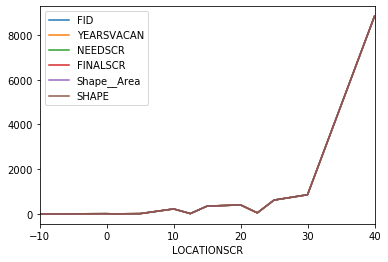

In [14]:
#plot to see the distrubtion of location scores so far
vl_sdf.groupby('LOCATIONSCR').count().plot()

In [15]:
#Make buffer around community centers
ccen_buffer.layers[0].query().sdf

/opt/conda/lib/python3.7/site-packages/IPython/lib/pretty.py:399: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,OBJECTID,BUFF_DIST,AnalysisArea,SHAPE
0,1,0.5,179.918973,"{""rings"": [[[-13047329.3875, 3882250.8677], [-..."
1,2,1.0,185.615145,"{""rings"": [[[-13049449.2125, 3902907.4122], [-..."
2,3,2.0,246.096318,"{""rings"": [[[-13049593.1668, 3905211.0781], [-..."
3,4,0.2,113.462630,"{""rings"": [[[-13045099.7129, 3874512.9457], [-..."


In [8]:
#Areas near community centers are multiplied 

ccen_curr_buffer = ccen_buffer.layers[0].query(where = 'OBJECTID = 4').sdf
closest_ccen = list(vl_sdf.spatial.join(ccen_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_ccen), 'LOCATIONSCR'] *= 2

ccen_curr_buffer = ccen_buffer.layers[0].query(where = 'OBJECTID = 1').sdf
closest_ccen = list(vl_sdf.spatial.join(ccen_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_ccen), 'LOCATIONSCR'] *= 1.75

ccen_curr_buffer = ccen_buffer.layers[0].query(where = 'OBJECTID = 2').sdf
closest_ccen = list(vl_sdf.spatial.join(ccen_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_ccen), 'LOCATIONSCR'] *= 1.5

ccen_curr_buffer = ccen_buffer.layers[0].query(where = 'OBJECTID = 3').sdf
closest_ccen = list(vl_sdf.spatial.join(ccen_curr_buffer).FID)
vl_sdf.loc[vl_sdf.FID.isin(closest_ccen), 'LOCATIONSCR'] *= 1.25

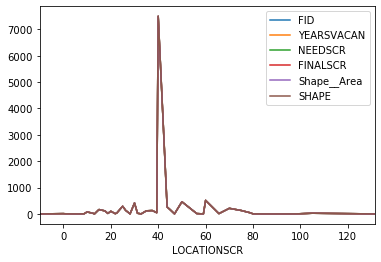

In [17]:
#plot to see the distrubtion of location scores so far
vl_sdf.groupby('LOCATIONSCR').count().plot()

In [9]:
#Give parcels a score for census tract income
income_sdf = income_fl.layers[0].query().sdf[['ID', 'MEDHINC_CY', 'OBJECTID', 'SHAPE']]
income_sdf.head()

,ID,MEDHINC_CY,OBJECTID,SHAPE
0,06073000100,121115,1,"{""rings"": [[[-13045412, 3863332], [-13044292, ..."
1,06073000201,74416,2,"{""rings"": [[[-13043154, 3862157], [-13044249, ..."
2,06073000202,83181,3,"{""rings"": [[[-13044064, 3862216], [-13043110, ..."
3,06073000300,69421,4,"{""rings"": [[[-13042749, 3861937], [-13041747, ..."
4,06073000400,64467,5,"{""rings"": [[[-13042590, 3863376], [-13042291, ..."


In [10]:
#The need score is quadrupled for census tracts w a avg household income under 25000, 
#tripled for those between 25 and 50000 and double for those between 50 and 75000
#Those above 75000 (about the average household income in San Diego) have a need score of 1
curr_tracts = income_sdf.loc[income_sdf['MEDHINC_CY'] <= 25000]
vl_in_tract = vl_sdf.spatial.join(curr_tracts).FID
vl_sdf.loc[vl_sdf.FID.isin(vl_in_tract), 'NEEDSCR'] = 4

curr_tracts = income_sdf.loc[(income_sdf['MEDHINC_CY'] <= 50000) & (income_sdf['MEDHINC_CY'] > 25000)]
vl_in_tract = vl_sdf.spatial.join(curr_tracts).FID
vl_sdf.loc[vl_sdf.FID.isin(vl_in_tract), 'NEEDSCR'] = 3

curr_tracts = income_sdf.loc[(income_sdf['MEDHINC_CY'] <= 75000) & (income_sdf['MEDHINC_CY'] > 50000)]
vl_in_tract = vl_sdf.spatial.join(curr_tracts).FID
vl_sdf.loc[vl_sdf.FID.isin(vl_in_tract), 'NEEDSCR'] = 2

In [20]:
#plot to see the distrubtion of need scores so far
vl_sdf.groupby('NEEDSCR').count()

,FID,YEARSVACAN,LOCATIONSCR,FINALSCR,Shape__Area,SHAPE
NEEDSCR,,,,,,
1,6559,6559,6559,6559,6559,6559
2,2825,2825,2825,2825,2825,2825
3,1965,1965,1965,1965,1965,1965
4,40,40,40,40,40,40


In [11]:
#Now we will calculate a final score based on the location score, the need score, and the years vacant.
vl_sdf['FINALSCR'] = vl_sdf['NEEDSCR'] * vl_sdf['LOCATIONSCR'] * vl_sdf['YEARSVACAN']
#Plot to see distribution of final score. Looks like a normal curve centered around 250 
#with some outliers in the thousands

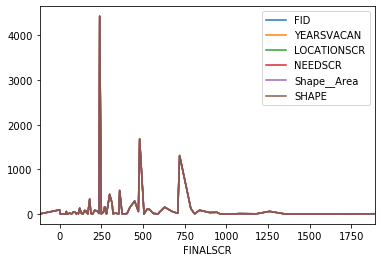

In [119]:
#Our best candidates are likely in the thousands!
vl_sdf.groupby('FINALSCR').count().plot()

In [22]:
vl_sdf.describe()

,FID,YEARSVACAN,LOCATIONSCR,NEEDSCR,FINALSCR,Shape__Area
count,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000,1.138900e+04
mean,5695.000000,5.861094,40.887315,1.603653,376.771600,2.661991e+05
std,3287.865442,0.790611,10.945148,0.778108,208.170579,3.852225e+06
min,1.000000,0.000000,-10.000000,1.000000,-120.000000,4.570312e+00
25%,2848.000000,6.000000,40.000000,1.000000,240.000000,1.877141e+03
50%,5695.000000,6.000000,40.000000,1.000000,270.000000,6.662734e+03
75%,8542.000000,6.000000,40.000000,2.000000,480.000000,3.253800e+04
max,11389.000000,6.000000,131.250000,4.000000,1890.000000,2.131124e+08


Below we have our most promising vacant lots which could be used as community gardens in the urban region. 
To find these we selected vacant lots with a final score of over 1250. 

In [10]:
m1 = gis.map('San Diego, CA')
vl_sdf.spatial.plot(map_widget= m1)
vacant_lot = m1.save({'title':'Map4',
                      'snippet': 'Potential community Gardens with final score',
                      'tags':'Community Gardens'},
                     owner = 'edoidic_UCSDOnline')
m1

MapView(layout=Layout(height='400px', width='100%'))

### Rural Area Suitability Analysis

Our project's purpose is to provide usable data to the San Diego region. Albeit lesser known, San Diego has many rural and unincorporated areas within the county (the region). As described in our Research Questions and Justification of Project (see Section 2), the more rural areas of the county will be analyzed using raster data in order to produce a suitability model which will determine which undeveloped parcels would be best to grow food in.

###### Set Boundaries and Prepare Data

In [61]:
usa_mean_rainfall = ImageryLayer("https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Rainfall/ImageServer", gis)

In [62]:
# Use geocoding to get the location of the study area in the spatial reference of the input data for the analysis.
study_area_gcd = geocode(address='San Diego County, CA', out_sr=usa_mean_rainfall.extent['spatialReference'])

# Get the geographic extent of the study area.
# This extent will be used for displaying the input data and output results.
study_area_extent = study_area_gcd[0]['extent']
study_area_extent

{'xmin': -1931399.6009269548,
 'ymin': -731590.9467073139,
 'xmax': -1735352.6568127687,
 'ymax': -499185.02669320535}

In [64]:
# Select San Diego County:
counties_lyr = counties_item.layers[0]
study_area_query = counties_lyr.query("FIPS='06073'", return_geometry=True)

In [65]:
# Get the geometry of the San Diego County feature.
# We will use this geometry to extract the input data for the study area.
study_area_geom= study_area_query.features[0].geometry
study_area_geom['spatialReference'] = study_area_query.spatial_reference
study_area_geom['spatialReference']

{'wkid': 102100, 'latestWkid': 3857}

In [66]:
#import the necessary dissolving package
#from arcgis.features.manage_data import *

In [67]:
#dissolve all vacant lots into one polygon
#vacants_dissolved = dissolve_boundaries(vl_fc)

In [68]:
#create the spatial reference from the dissolved shape
vacants_lyr = vl_fc.layers[0]
vacants_area_query= vacants_lyr.query(return_geometry=True)

In [69]:
vacants_area_geom= vacants_area_query.features[0].geometry
vacants_area_geom['spatialReference'] = vacants_area_query.spatial_reference
vacants_area_geom['spatialReference']

{'wkid': 102100, 'latestWkid': 3857}

We will start by analyzing three factors critical to the success of agricultural growth for all the vacant lots in San Diego. These factors are slope, rainfall, and temperature. Vacant lots with reasonably even slope, moderate temperatures and moderate rain present the best opportunities for community gardens within the rural areas of the county

###### Rainfall

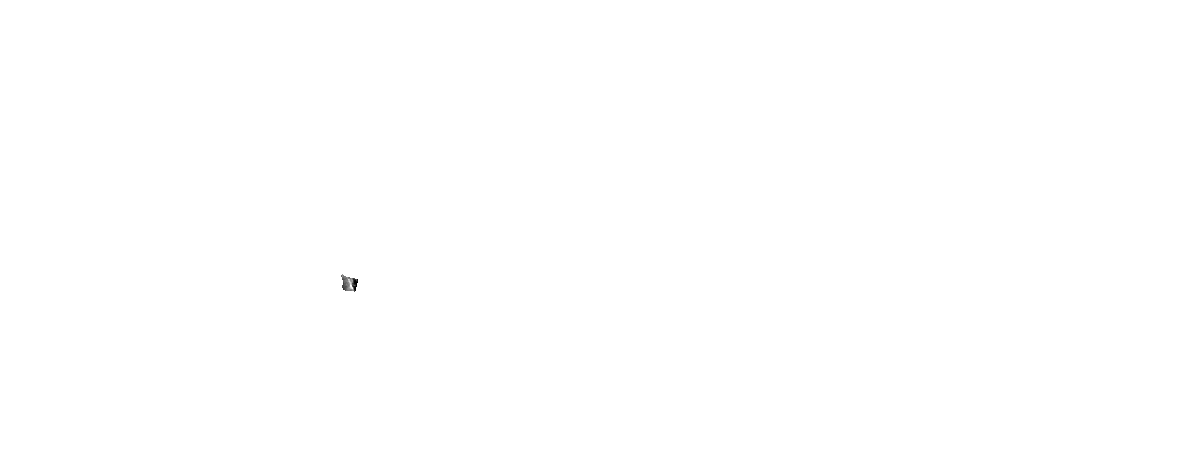

In [70]:
# Let's clip our slope, elevation, and mean rainfall to the study area
rainfall_study_area = clip(raster=usa_mean_rainfall, geometry=study_area_geom)

# Apply the Stretch function to enhance the display of the clipped layer.
stretch(raster=rainfall_study_area, stretch_type='StdDev', dra='true')

In [71]:
# This looks like a nice imagery layer. Let's add it to a map widget
map_rainfall = gis.map()
map_rainfall.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                    'xmax': -12899970.884006657,
                    'xmin': -13094557.353913298,
                    'ymax': 4016441.7785463207,
                    'ymin': 3784318.1781899934}
map_rainfall.legend=True
map_rainfall.add_layer(rainfall_study_area)

In [72]:
# Create a colormap to display the analysis results with 9 colors ranging from red to green to yellow.
clrmap = [[1, 230, 0, 0], [2, 242, 85, 0], [3, 250, 142, 0], [4, 255, 195, 0], [5, 255, 255, 0], [6, 197, 219, 0],  
          [7, 139, 181, 0], [8, 86, 148, 0], [9, 38, 115, 0]]

In [73]:
# Reclassify (normalize) the rainfall data
rainfall_normalized = remap(rainfall_study_area,
                       input_ranges=[32,39, 28,32, 24,28, 20,24, 
                                     16,20, 12,16, 8,12, 4,8, -1,4],
                       output_values=[9,8,7,6,5,4,3,2,1], astype='U8')

# Display color-mapped image of the reclassified rainfall data
rainfall_n = colormap(rainfall_normalized, colormap=clrmap)

In [74]:
#map and display the normalization with the vacant lots
map_rainfall_n = gis.map()
map_rainfall_n.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                        'xmax': -12899970.884006657,
                        'xmin': -13094557.353913298,
                        'ymax': 4016441.7785463207,
                        'ymin': 3784318.1781899934}          
map_rainfall_n.legend=True
map_rainfall_n.add_layer(rainfall_n)

#### Rainfall Map

In this map, areas that recieve less rain are represented in Red, while areas that recieve more rain are represented in Green.

In [75]:
#add vacant lots and community gardens
map_rainfall_n.add_layer(vl_fc)
map_rainfall_n.add_layer(cgs_fc)
map_rainfall_n

MapView(layout=Layout(height='400px', width='100%'), legend=True)

###### Temperature

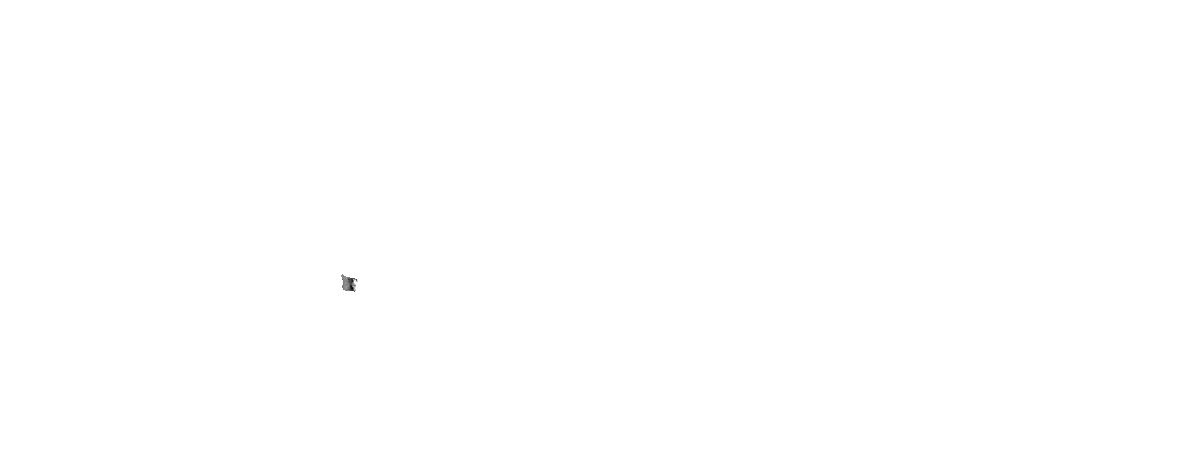

In [76]:
# Create Temperature study area using clip function
temperature_study_area = clip(raster=usa_mean_temperature, geometry=study_area_geom)

# Apply the Stretch function to enhance the display of the temperature_clipped layer.
stretch(raster=temperature_study_area, stretch_type='StdDev', dra='true')

In [77]:
# This looks like a nice imagery layer. Let's add it to a map widget
map_temperature = gis.map()
map_temperature.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                        'xmax': -12899970.884006657,
                        'xmin': -13094557.353913298,
                        'ymax': 4016441.7785463207,
                        'ymin': 3784318.1781899934}
map_temperature.legend=True
map_temperature.add_layer(temperature_study_area)

In [78]:
# Reclassify (normalize) the temperature data
temperature_normalized = remap(temperature_study_area,
                         input_ranges=[20.24,23, 19.46,20.24, 18.68,19.46, 17.9,18.68, 
                                     17.12,17.9, 16.34,17.12, 15.56,16.34, 14.78,15.56, 10,14.78],
                         output_values=[1,2,3,4,5,6,7,8,9], astype='U8')

# Display color-mapped image of the reclassified temperature data
temperature_n = colormap(temperature_normalized, colormap=clrmap)

In [79]:
# normalize and display
map_temperature_n = gis.map()
map_temperature_n.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                            'xmax': -12899970.884006657,
                            'xmin': -13094557.353913298,
                            'ymax': 4016441.7785463207,
                            'ymin': 3784318.1781899934}          
map_temperature_n.legend=True
map_temperature_n.add_layer(temperature_n)
map_temperature_n

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [80]:
# Create a binary colormap to display the analysis results with 2 colors: red and green.
clrmap2 =  [[1, 230, 0, 0], [0, 38, 115, 0]]

In [81]:
# Create binary map of temperature using remap function
temperature_b = remap(raster=temperature_study_area,
                      input_ranges=[16.5,23.0, 10.0,16.5],
                      output_values=[1,0], astype='U8')

# Display a color-mapped image of the binary map
temperature_b_c = colormap(temperature_b, colormap=clrmap2)

In [82]:
# This looks like a nice imagery layer. Let's add it to a map widget
map_temperature = gis.map()
map_temperature.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                        'xmax': -12899970.884006657,
                        'xmin': -13094557.353913298,
                        'ymax': 4016441.7785463207,
                        'ymin': 3784318.1781899934}
map_temperature.legend=True
map_temperature.add_layer(temperature_study_area)
map_temperature

MapView(layout=Layout(height='400px', width='100%'), legend=True)

#### Temperature Map

In [83]:
#add vacant lots
map_temperature.add_layer(vl_fc)
map_temperature.add_layer(cgs_fc)
map_temperature

MapView(layout=Layout(height='400px', width='100%'), legend=True)

###### Slope

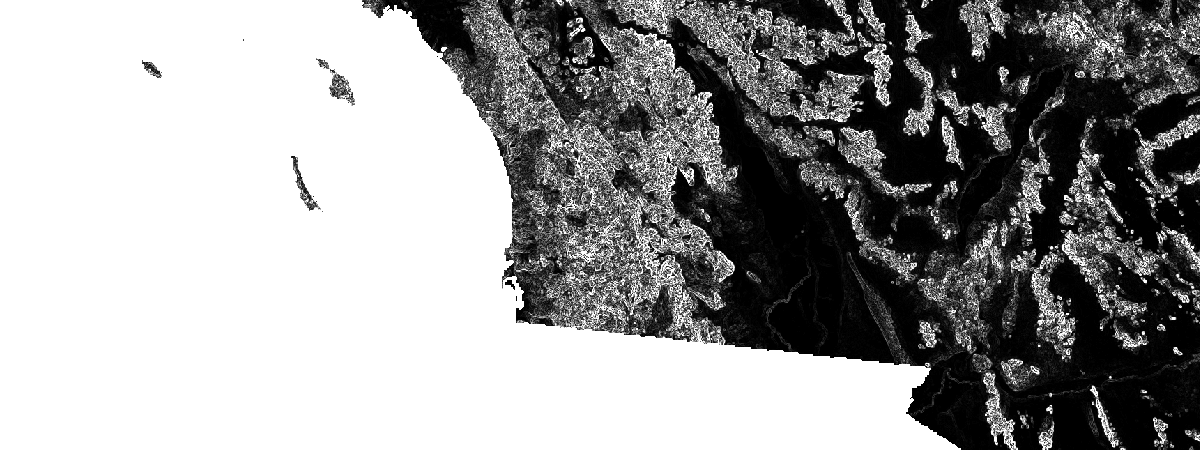

In [84]:
# Derive a slope layer from the DEM layer using the slope function
slope_lyr = slope(dem=usa_slope, slope_type='DEGREE', z_factor=10)
slope_lyr.extent = study_area_extent

# Use the stretch function to enhance the display of the slope layer.
stretch(raster=slope_lyr, stretch_type='StdDev', dra='true')

In [85]:
# This looks like a nice imagery layer. Let's add it to a map widget
map_slope = gis.map()
map_slope.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                    'xmax': -12899970.884006657,
                    'xmin': -13094557.353913298,
                    'ymax': 4016441.7785463207,
                    'ymin': 3784318.1781899934}          
map_slope.legend=True
map_slope.add_layer(slope_lyr)

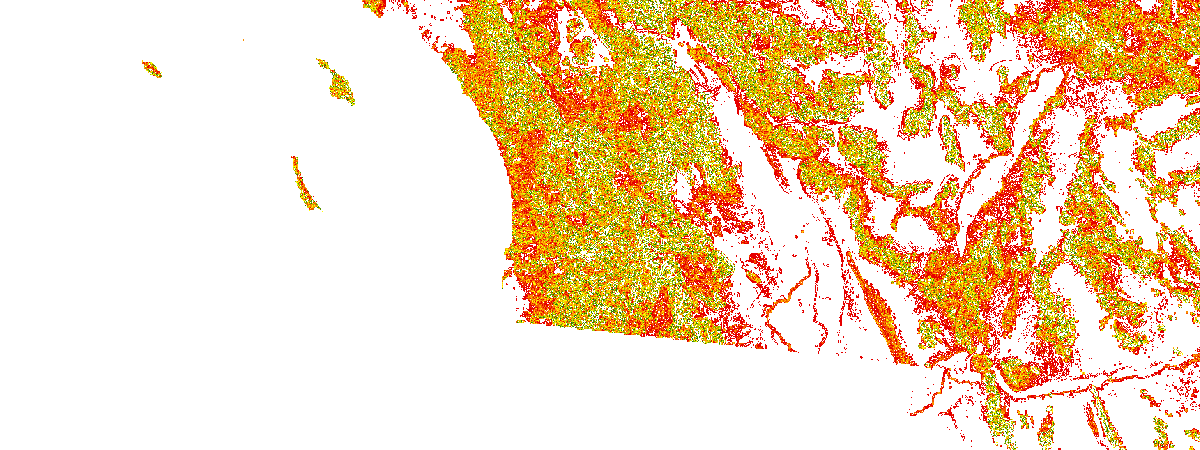

In [86]:
# The same colormap can be applied to other rasters
colormap(slope_lyr, colormap=clrmap)

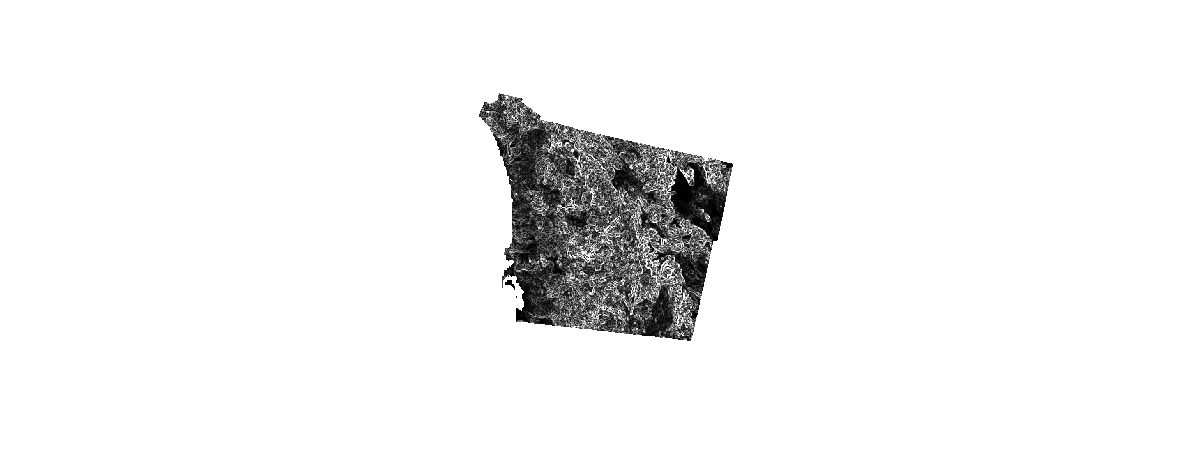

In [87]:
# Create Slope study area by using the clip function
slope_study_area = clip(raster=slope_lyr, geometry=study_area_geom)

# Apply the Stretch function to enhance the display of the slope_clipped layer.
stretch(raster=slope_study_area, stretch_type='StdDev', dra='true')

In [88]:
# Create a binary colormap to display the analysis results with 2 colors: red and green.
clrmap2 =  [[1, 230, 0, 0], [0, 38, 115, 0]]

In [89]:
# Create binary map of slope using remap function
slope_b = remap(raster=slope_study_area,
                  input_ranges=[0,45 , 45,100],
                  output_values=[1,0],  astype='U8')

# Display a color-mapped image of the binary map
slope_b_c = colormap(slope_b, colormap=clrmap2)


In [90]:
# This looks like a nice imagery layer. Let's add it to a map widget
map_slope = gis.map()
map_slope.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                    'xmax': -12899970.884006657,
                    'xmin': -13094557.353913298,
                    'ymax': 4016441.7785463207,
                    'ymin': 3784318.1781899934}
map_slope.legend=True
map_slope.add_layer(slope_study_area)

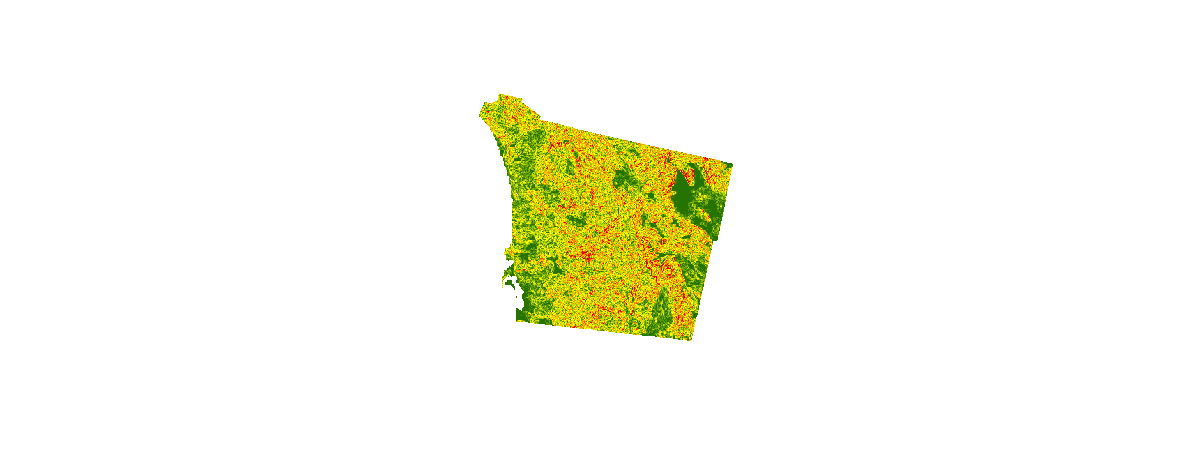

In [91]:
# Reclassify the slope data
slope_normalized = remap(raster=slope_study_area, 
                        input_ranges=[0,1, 1,2, 2,3, 3,5, 5,7, 7,9, 9,12, 12,15, 15,100],
                        output_values=[9,8,7,6,5,4,3,2,1],  astype='U8') 

# Display a color-mapped image of the reclassified slope data
slope_n = colormap(slope_normalized, colormap=clrmap)
slope_n

In [92]:
# This looks like a nice imagery layer. Let's add it to a map widget
map_slope = gis.map()
map_slope.extent = {'spatialReference':{'latestwkid':3857, 'wkid':102100},
                    'xmax': -12899970.884006657,
                    'xmin': -13094557.353913298,
                    'ymax': 4016441.7785463207,
                    'ymin': 3784318.1781899934}
map_slope.legend=True
map_slope.add_layer(slope_n)


#### Slope Map

In this map, "1" is representing steep slopes, and "9" represents more flat areas.

In [93]:
# add vacant lots + community gardens
map_slope.add_layer(vl_fc)
map_slope.add_layer(cgs_fc)
map_slope

MapView(layout=Layout(height='400px', width='100%'), legend=True)

## Summary of Products and Results + Discussion

##### Urban Analysis Conclusions

In our analysis we whittled down our inital 11389 vacant lots into 70 promising vacant lots clustered in lower income areas. This information is important because it provides localities 70 opportunities to beautify an otherwise unsightly parcel, strengthen the social tissue of a neighborhood, and bring healthy options into neighborhoods that might otherwise not have access to such food.

We perhaps did not describe a quantifiable benefit in our analysis but we did find areas where a quantifiable benefit could be discovered (if there were, say, data collection done at one of these potential community gardens). 
It is important to consider that our vacant lots data is from 2019, and that some of our data, while certainly not irrelevant, including the census income data and the existing community garden addresses, for example, may be outdated. 

Nevertheless, it is important to observe the sheer amount of unused land in San Diego and our analysis, if not just to decide the feasability of a community garden in a parcel, at least should describe the severity of the misuse of these parcels; we found that there are many under used parcels in communities that would strongly benefit from the renovation or repurposement of empty/undeveloped lots into more useful developements.

In [12]:
m1 = gis.map('San Diego, CA')
vl_sdf.loc[vl_sdf['FINALSCR'] >= 1250].spatial.plot(map_widget= m1,  
                                                    color = 'RED', 
                                                    outline_color = 'CMRmap_r',
                                                    line_width = 5)
vacant_lot = m1.save({'title':'Best Potential Community Gardens',
                      'snippet': 'Potential community Gardens with best final score',
                      'tags':'Community Gardens'},
                     owner = 'edoidic_UCSDOnline')
m1

MapView(layout=Layout(height='400px', width='100%'))

##### Rural Analysis Conclusions

Despite the fact that all of the 19 jurisdictions within San Diego County are clustered near the coast, San Diego County extends east almost to the Salton Sea. This vast area comes with varying climates, topography, and population densities. Based off the raster analysis of rural areas above, we can draw the following conclusions about the potential for community gardens in rural areas:

1. San Diego's existing community gardens are clustered near the coast - rural areas are underserved.

2. San Diego's population continues to expand to the east, and vacant lots are dense just east of the urban areas. These areas are also relatively flat, recieve adequate levels of rain, and have moderate temperatures. Areas just to the east of existing urban development have high potential for community garden development. 

3. Central and East San Diego County lack the potential for community garden because they have steep topography and desert climates (respectively), neither of which assist in community garden growth. 

## Future Work

Some future work would involve gathering further data and recalibrating our models and pipelines to create more accurate results. As of now some of our values may seem arbitrary and were chosen based on intuition and our domain knowledge but in the future more well-researched numbers values will be used to score areas for best use as a community garden. 